In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
# load data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

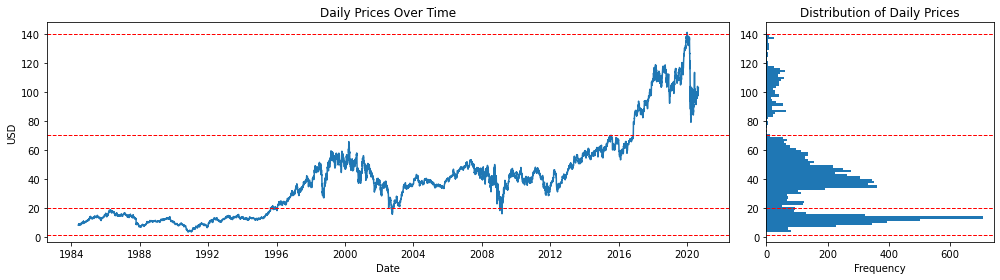

In [4]:
# Plot the trend and histogram of prices together
# initialize two subplots in 1 row and 2 columns. Also specify the size and width of each plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0].plot(prices)
ax[0].set_title("Daily Prices Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("USD")

# let's draw the horizontal red lines at some pre-set values
for i in [1, 20, 70, 140]:
    ax[0].axhline(i, color="r", linewidth=1, linestyle="--")

# create the histogram of prices in the second plot
ax[1].hist(prices, bins=90, orientation="horizontal")
ax[1].set_title("Distribution of Daily Prices")
ax[1].set_xlabel("Frequency")

# draw again the horizontal lines
for i in [1, 20, 70, 140]:
    ax[1].axhline(i, color="r", linewidth=1, linestyle="--")

fig.tight_layout()
plt.show()

In [5]:
# generate the random component for 30 days
x_t = pd.Series(np.random.normal(size=30))

# set the level
level = 25

# time series y_t
y_t = level + x_t

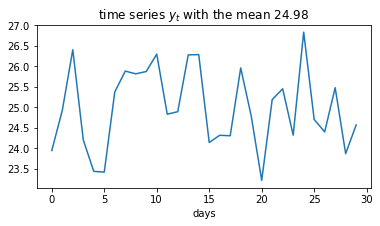

In [6]:
y_t.plot(figsize=(6, 3))
plt.title("time series $y_t$ with the mean {:.2f}".format(y_t.mean()))
plt.xlabel("days")

plt.show()

In [9]:
# generate the random component for 90 days
x_t = pd.Series(np.random.normal(size=90))

# generate the downward trend
tr_t = level + pd.Series(-0.08 * np.linspace(1, 90, 90))

# time series y_t
y_t = tr_t + x_t

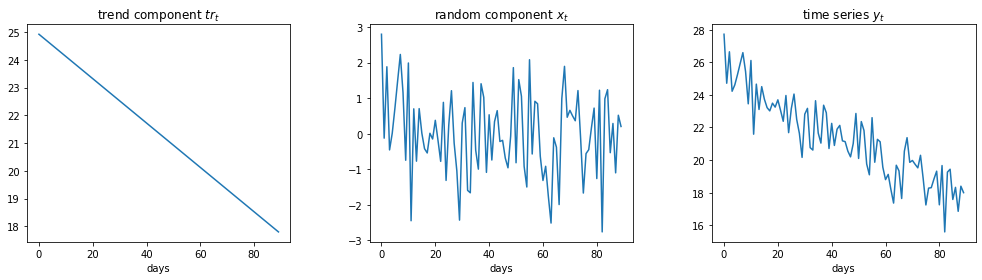

In [10]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("days")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("days")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("days")

plt.show()

In [11]:
# generate the random component for 36 months
x_t = pd.Series(np.random.normal(size=36))

# generate the seasonal term
t = np.linspace(1, 36, 36)
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = s_t + x_t

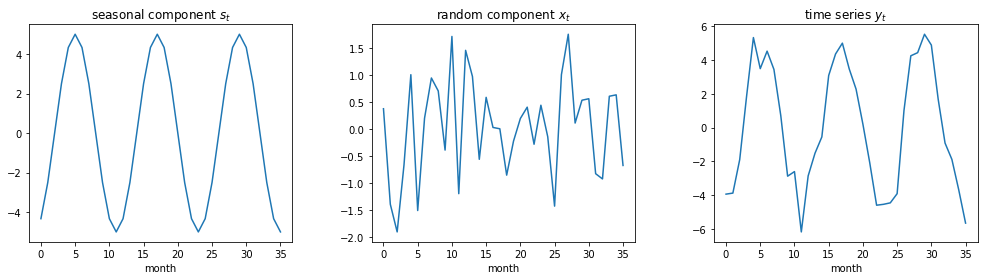

In [12]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(17, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

s_t.plot(ax=axes[0])
axes[0].set_title("seasonal component $s_t$")
axes[0].set_xlabel("month")

x_t.plot(ax=axes[1])
axes[1].set_title("random component $x_t$")
axes[1].set_xlabel("month")

y_t.plot(ax=axes[2])
axes[2].set_title("time series $y_t$")
axes[2].set_xlabel("month")

plt.show()

In [13]:
# generate the random component for 120 months
x_t = pd.Series(np.random.normal(size=120))

# generate the trend
t = np.linspace(1, 120, 120)
tr_t = pd.Series(0.08 * t)

# generate the seasonal term
s_t = pd.Series(5 * np.cos(1 * np.pi * t / 6 + 1 * np.pi))

# time series y_t
y_t = tr_t + s_t + x_t

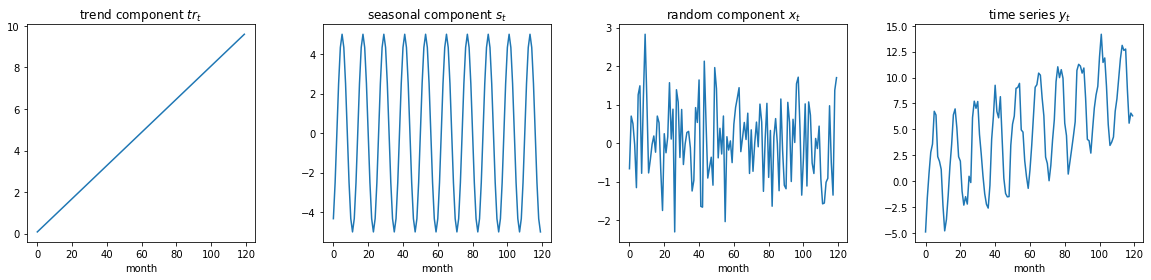

In [14]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=4,
    figsize=(20, 4),
    gridspec_kw={"hspace": 0.3, "wspace": 0.3},
)

tr_t.plot(ax=axes[0])
axes[0].set_title("trend component $tr_t$")
axes[0].set_xlabel("month")

s_t.plot(ax=axes[1])
axes[1].set_title("seasonal component $s_t$")
axes[1].set_xlabel("month")

x_t.plot(ax=axes[2])
axes[2].set_title("random component $x_t$")
axes[2].set_xlabel("month")

y_t.plot(ax=axes[3])
axes[3].set_title("time series $y_t$")
axes[3].set_xlabel("month")

plt.show()

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess

#  create the time index
index = pd.period_range("2021-01-01", freq="M", periods=12)

# create the deterministic components
det_components = DeterministicProcess(
    index, constant=True, order=1, seasonal=True, period=3, fourier=0
)
det_components.in_sample()

,const,trend,"s(2,3)","s(3,3)"
2021-01,1.0,1.0,0.0,0.0
2021-02,1.0,2.0,1.0,0.0
2021-03,1.0,3.0,0.0,1.0
2021-04,1.0,4.0,0.0,0.0
2021-05,1.0,5.0,1.0,0.0
2021-06,1.0,6.0,0.0,1.0
2021-07,1.0,7.0,0.0,0.0
2021-08,1.0,8.0,1.0,0.0
2021-09,1.0,9.0,0.0,1.0
2021-10,1.0,10.0,0.0,0.0


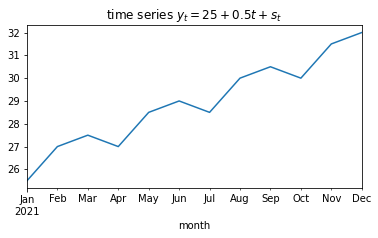

In [16]:
# convert the components to numpy arrays
det_terms = det_components.in_sample().to_numpy()

# create parameters
params = np.array([25, 0.5, 1, 1])

# create the time series y
y = pd.Series(det_terms.dot(params), index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}$")
plt.xlabel("month")
plt.show()

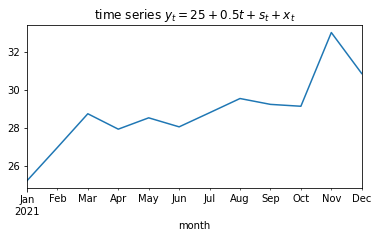

In [17]:
# create the random noise x
x = np.random.normal(size=12)

# create the time series y
y = pd.Series(det_terms.dot(params) + x, index=index)

# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}=25+0.5t+s_{t}+x_{t}$")
plt.xlabel("month")
plt.show()

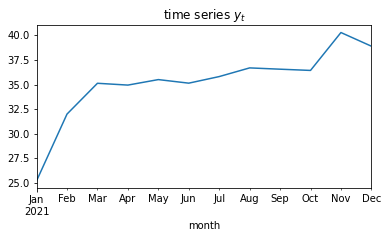

In [18]:
# initialize the process
y = np.empty(12)
y[0] = det_terms[0].dot(params) + x[0]

# create the time series y
for t in range(1, 12):
    y[t] = 0.2 * y[t - 1] + det_terms[t].dot(params) + x[t]
y = pd.Series(y, index=index)


# plot y
y.plot(figsize=(6, 3))
plt.title("time series $y_{t}$")
plt.xlabel("month")
plt.show()

In [22]:
# load the data
data = pd.read_csv("c2_homog_mo_BER.txt", skiprows=27, sep="\s+")

# create time index
data["Date"] = data["Year"].astype("str") + "-" + data["Month"].astype("str")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.index.name = "Date"

# check a few rows of data
data.head()


,Year,Month,Temperature,Precipitation
Date,,,,
1864-01-01,1864,1,-7.6,22.5
1864-02-01,1864,2,-1.8,26.5
1864-03-01,1864,3,3.9,57.1
1864-04-01,1864,4,6.5,55.1
1864-05-01,1864,5,11.9,68.5


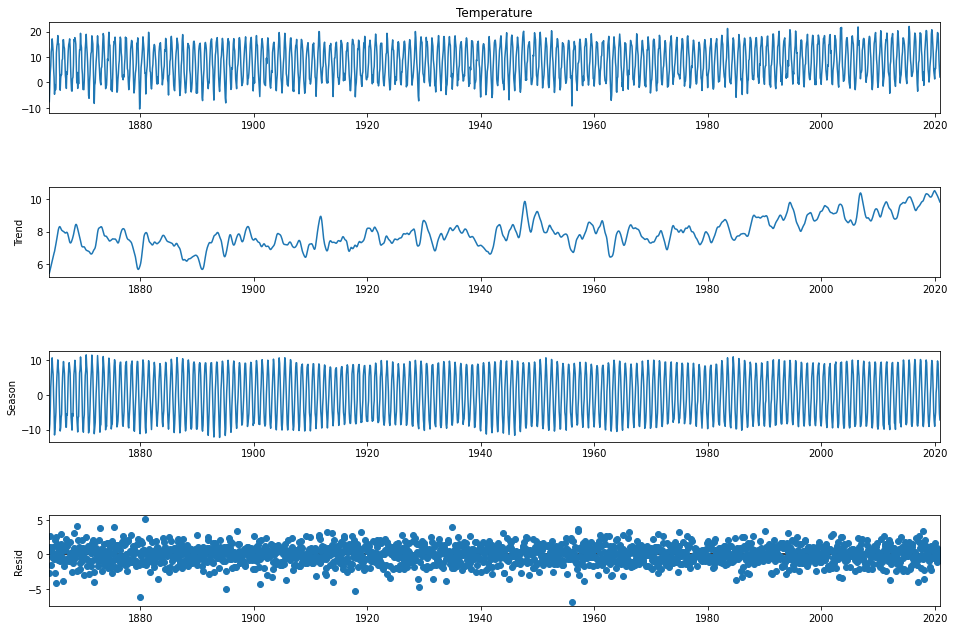

In [23]:
from statsmodels.tsa.seasonal import STL

# decomposition
res = STL(data["Temperature"]).fit()
fig = res.plot()

fig.set_size_inches(15, 10)
plt.show()

In [24]:
from pandas.plotting import autocorrelation_plot, lag_plot

# generate the random component
x_t = pd.Series(np.random.normal(size=100))

level = 25

# time series y_t
y_t = level + x_t

In [25]:
# set the number of lag to be 1
n = 1

# calculate the autocorrelation for the 1st lag
print("autocorr with the 1st lag: {:.3f}".format(y_t.autocorr(n)))

# this is equivalent to
print("correlation with the 1st lag: {:.3f}".format(y_t.corr(y_t.shift(n))))

# and also to
print("correlation with the 1st lead: {:.3f}".format(y_t.corr(y_t.shift(-n))))

autocorr with the 1st lag: 0.170
correlation with the 1st lag: 0.170
correlation with the 1st lead: 0.170


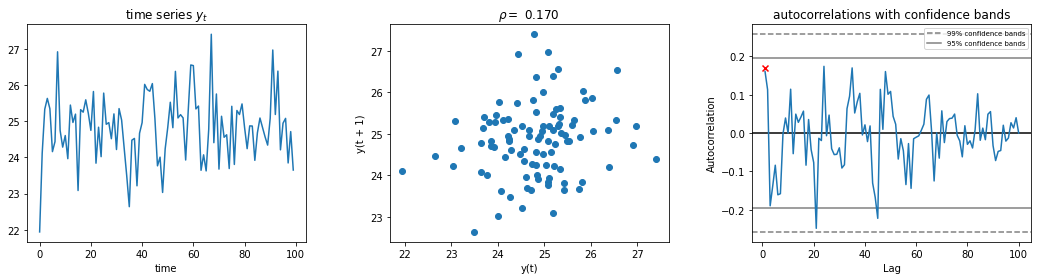

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), gridspec_kw={"wspace": 0.3})

# the 1st plot on the left: plot y_t
y_t.plot(ax=axes[0])
axes[0].set_title("time series $y_{t}$")
axes[0].set_xlabel("time")

# the middle plot: scatter plot of y_t against its 1st lag
lag_plot(y_t, ax=axes[1])
axes[1].set_title(r"$\rho = $ {:.3f}".format(y_t.autocorr(1)))

# the 1st plot on the right: autocorrelations up to 100 lags
autocorrelation_plot(y_t, ax=axes[2])
axes[2].set_title("autocorrelations with confidence bands")
axes[2].legend(["99% confidence bands", "95% confidence bands"], fontsize="x-small")
axes[2].grid()

# let's put a red cross on the 1st autocorrelation value
axes[2].scatter(1, y_t.autocorr(1), marker="x", c="red")

plt.show()

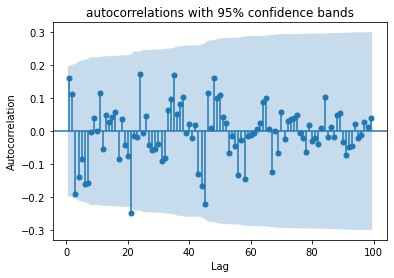

In [27]:
# load the module
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y_t, lags=99, alpha=0.05, zero=False)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("autocorrelations with 95% confidence bands")
plt.show()

In [28]:
# load unemployment rates
unemp = pd.read_csv("c2_LMUNRRTTCHQ156S.csv", index_col="DATE")
unemp.index = pd.to_datetime(unemp.index, format="%Y-%m-%d")

# load GDP data
gdp = pd.read_csv("c2_CPMNACSAB1GQCH.csv", index_col="DATE")
gdp.index = pd.to_datetime(gdp.index, format="%Y-%m-%d")

# load stock prices
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")
prices = data["Close"]

# load temperature data
temp = pd.read_csv(
    "c2_daily-min-temperatures.txt", parse_dates=["Date"], index_col="Date"
)

# generate random noise
np.random.seed(5)
noise = pd.DataFrame(
    np.random.normal(size=240),
    columns=["noise"],
    index=pd.date_range("2001-jan", periods=240, freq="M"),
)

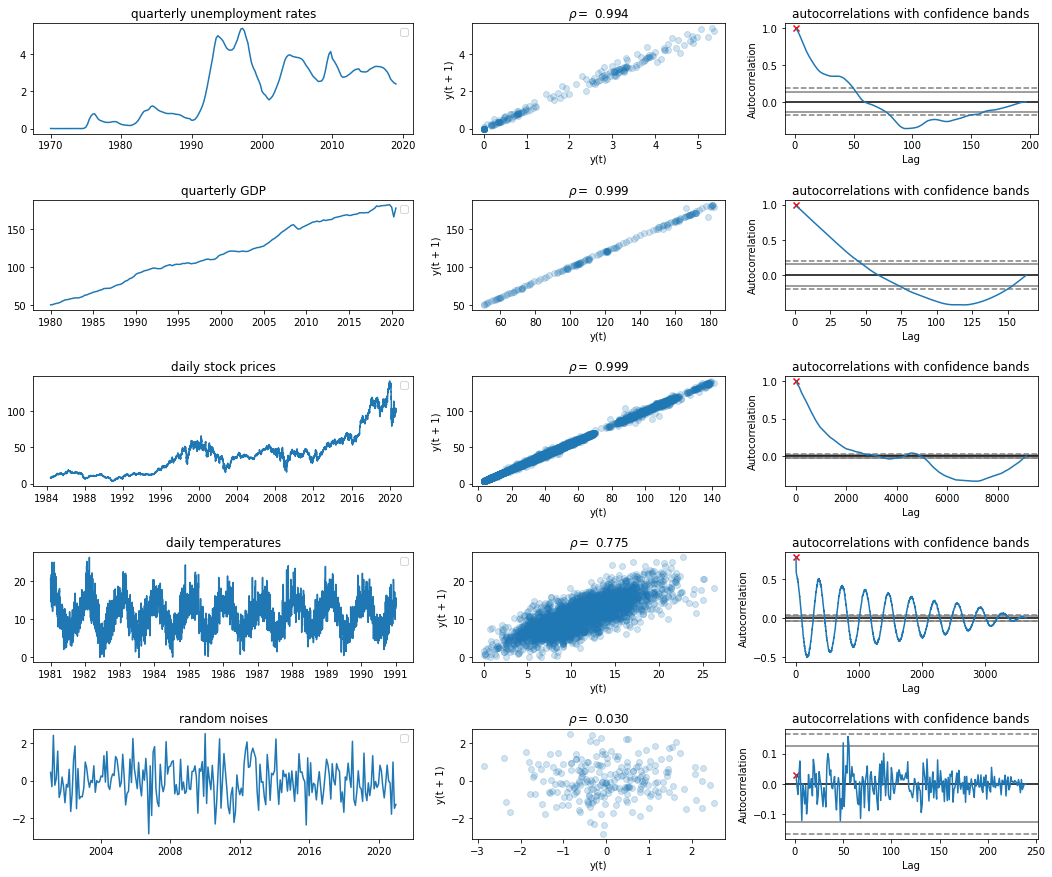

In [29]:
fig, axes = plt.subplots(
    nrows=5,
    ncols=3,
    figsize=(18, 15),
    gridspec_kw={"hspace": 0.6, "wspace": 0.2, "width_ratios": [1.5, 1, 1]},
)

# 1st column of plots on the left: plot the data
axes[0, 0].plot(unemp)
axes[1, 0].plot(0.001 * gdp)
axes[2, 0].plot(prices)
axes[3, 0].plot(temp)
axes[4, 0].plot(noise)

#  define the titles
titles = [
    "quarterly unemployment rates",
    "quarterly GDP",
    "daily stock prices",
    "daily temperatures",
    "random noises",
]

#  add labels and titles
for (ax, t) in zip(axes[:, 0].flatten(), titles):
    ax.legend("")
    ax.set_xlabel("")
    ax.set_title(str(t))

# middle column: scatter plots of the values with their first lags
lag_plot(unemp, lag=1, ax=axes[0, 1], alpha=0.2)
lag_plot(0.001 * gdp, lag=1, ax=axes[1, 1], alpha=0.2)
lag_plot(prices, lag=1, ax=axes[2, 1], alpha=0.2)
lag_plot(temp, lag=1, ax=axes[3, 1], alpha=0.2)
lag_plot(noise, lag=1, ax=axes[4, 1], alpha=0.2)

# squeeze dataframes to series and set the titles for lag_plots in the middle column
axes[0, 1].set_title(r"$\rho = $ {:.3f}".format(unemp.squeeze().autocorr(1)))
axes[1, 1].set_title(r"$\rho = $ {:.3f}".format(gdp.squeeze().autocorr(1)))
axes[2, 1].set_title(r"$\rho = $ {:.3f}".format(prices.squeeze().autocorr(1)))
axes[3, 1].set_title(r"$\rho = $ {:.3f}".format(temp.squeeze().autocorr(1)))
axes[4, 1].set_title(r"$\rho = $ {:.3f}".format(noise.squeeze().autocorr(1)))

# 1st column of plots on the right: plot autocorrelations
autocorrelation_plot(unemp, ax=axes[0, 2])
autocorrelation_plot(gdp, ax=axes[1, 2])
autocorrelation_plot(prices, ax=axes[2, 2])
autocorrelation_plot(temp, ax=axes[3, 2])
autocorrelation_plot(noise, ax=axes[4, 2])

# add titles
for ax in axes[:, 2].flatten():
    ax.grid()
    ax.set_title("autocorrelations with confidence bands")

# add the red cross on the 1st lag
axes[0, 2].scatter(1, unemp.squeeze().autocorr(1), marker="x", c="red")
axes[1, 2].scatter(1, gdp.squeeze().autocorr(1), marker="x", c="red")
axes[2, 2].scatter(1, prices.squeeze().autocorr(1), marker="x", c="red")
axes[3, 2].scatter(1, temp.squeeze().autocorr(1), marker="x", c="red")
axes[4, 2].scatter(1, noise.squeeze().autocorr(1), marker="x", c="red")

plt.show()

In [30]:
# Ljung-Box test of autocorrelations for the first lags
test = []
test.append(sm.stats.acorr_ljungbox(unemp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(gdp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(prices, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(temp, lags=[1], return_df=False))
test.append(sm.stats.acorr_ljungbox(noise, lags=[1], return_df=False))

pd.DataFrame(
    test,
    columns=["LB test statistic", "p-value"],
    index=["unemp", "gdp", "prices", "temp", "noise"],
    dtype=np.float,
).round(2)

,LB test statistic,p-value
unemp,195.92,0.00
gdp,160.30,0.00
prices,9122.68,0.00
temp,2189.94,0.00
noise,0.21,0.64
